In [1]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
stock = pd.read_csv('D:\\USC\\Courses\\Spring2022\\DSO530\\option_train.csv')

In [3]:
stock.head(5)

,Value,S,K,tau,r,BS
0,21.670404,431.623898,420.0,0.341270,0.03013,Under
1,0.125000,427.015526,465.0,0.166667,0.03126,Over
2,20.691244,427.762336,415.0,0.265873,0.03116,Under
3,1.035002,451.711658,460.0,0.063492,0.02972,Over
4,39.553020,446.718974,410.0,0.166667,0.02962,Under


In [4]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   1679 non-null   float64
 1   S       1679 non-null   float64
 2   K       1678 non-null   float64
 3   tau     1679 non-null   float64
 4   r       1680 non-null   float64
 5   BS      1680 non-null   object 
dtypes: float64(5), object(1)
memory usage: 78.9+ KB


<font color='blue'> **Check if dataset is balanced** </font>

In [5]:
stock['BS'].value_counts()

Under    946
Over     734
Name: BS, dtype: int64

<font color='blue'> **Removing Null Values** </font>

In [6]:
stock1 = stock[stock['K'].notna()]

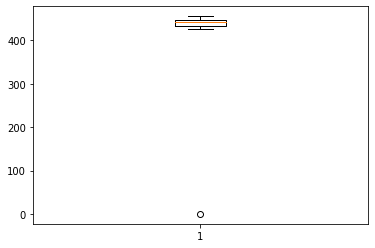

In [7]:
import matplotlib.pyplot as plt
plt.boxplot(stock1['S'])
plt.show()

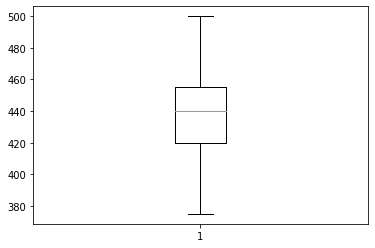

In [8]:
import matplotlib.pyplot as plt
plt.boxplot(stock1['K'])
plt.show()

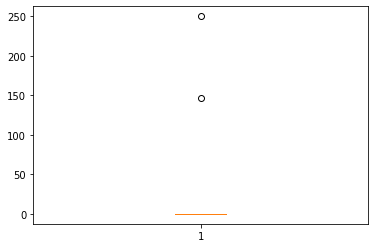

In [9]:
import matplotlib.pyplot as plt
plt.boxplot(stock1['tau'])
plt.show()

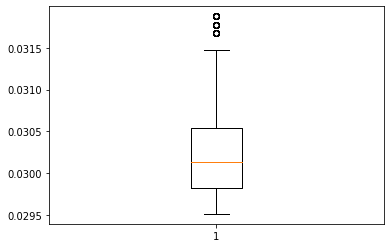

In [10]:
import matplotlib.pyplot as plt
plt.boxplot(stock1['r'])
plt.show()

In [11]:
stock2 = stock1[stock1['S'] != 0]

In [12]:
stock3 = stock2[stock2['tau']<100]

In [13]:
X = stock3[['S','K', 'tau', 'r']]
y = stock3['Value']

In [14]:
stock3

,Value,S,K,tau,r,BS
0,21.670404,431.623898,420.0,0.341270,0.03013,Under
1,0.125000,427.015526,465.0,0.166667,0.03126,Over
2,20.691244,427.762336,415.0,0.265873,0.03116,Under
3,1.035002,451.711658,460.0,0.063492,0.02972,Over
4,39.553020,446.718974,410.0,0.166667,0.02962,Under
...,...,...,...,...,...,...
1675,1.470000,444.397163,475.0,0.273810,0.03034,Over
1676,34.927317,438.453825,410.0,0.301587,0.02972,Under
1677,41.127997,428.042219,390.0,0.170635,0.03188,Under
1678,0.440003,439.081203,480.0,0.293651,0.02962,Over


# **SVM Classification**

In [15]:
import numpy as np
stock3['BS_class'] = np.where(stock3['BS'] == 'Over',1,-1)

<ipython-input-15-6ee9e9d66330>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock3['BS_class'] = np.where(stock3['BS'] == 'Over',1,-1)


In [16]:
stock3.columns

Index(['Value', 'S', 'K', 'tau', 'r', 'BS', 'BS_class'], dtype='object')

In [17]:
stock3 = stock3[['Value', 'S', 'K', 'tau', 'r','BS_class']]

In [18]:
stock_train = stock3[['S','K','tau','r']]
y_train  = np.array(stock3['BS_class'])

In [19]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
stock_train_norm = mms.fit_transform(stock_train)

In [20]:
from sklearn.model_selection import KFold
kfolds = KFold(n_splits=10,random_state=42,shuffle=True)

In [21]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='rbf',gamma = 'scale', C = 10,max_iter = 2000) # Linear Kernel
error_model_1_cv = cross_val_score(clf,stock_train_norm,y_train, cv=kfolds)

In [22]:
import numpy as np
print("SVM: \n")
print("accuracies of 10-folds:",error_model_1_cv,"(mean classification error:",1-np.mean(error_model_1_cv),")")

SVM: 

accuracies of 10-folds: [0.96428571 0.9047619  0.94642857 0.91071429 0.92857143 0.91017964
 0.95808383 0.95808383 0.92215569 0.94011976] (mean classification error: 0.06566153407470754 )


In [23]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [24]:
clf.fit(stock_train_norm, y_train)

SVC(C=10, max_iter=2000)

In [25]:
y_pred =  clf.predict(stock_train_norm)

In [26]:
#ROC curve
fpr,tpr,threshold = roc_curve(y_train, y_pred)

In [27]:
roc_auc = auc(fpr,tpr)
roc_auc

0.9447221279693285

<Figure size 432x288 with 0 Axes>

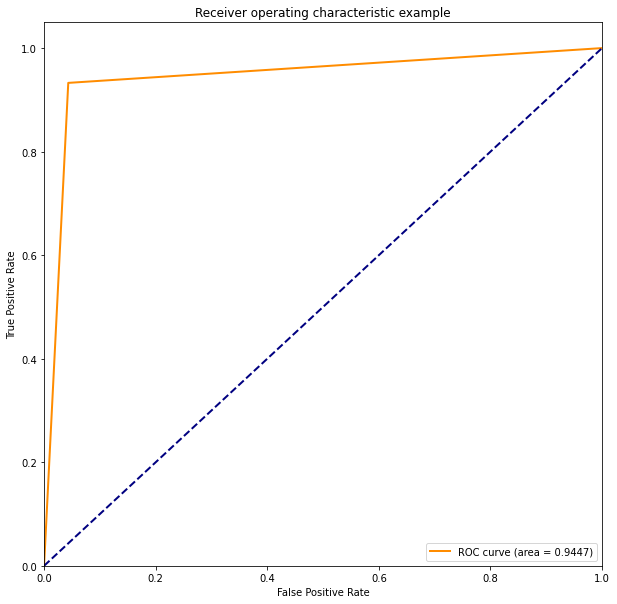

In [28]:
plt.figure()
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
lw=2, label='ROC curve (area = {0:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # lw is linewidth
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# **SVM Regression**

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [30]:
from sklearn.svm import SVR

In [31]:
stock_train = stock3[['S','K','tau','r']]
y_train = np.array(stock3['Value'])

In [32]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
stock_train_norm = mms.fit_transform(stock_train)

In [33]:
SVM_Model = svm.SVR(gamma= 'auto')

In [34]:
kfolds_regresssion = KFold(n_splits = 10, random_state = 1, shuffle = True)
reg = svm.SVR(kernel='rbf',gamma = 1, C = 100,epsilon = 0.2)
r2_model_1_cv = cross_val_score(reg, stock_train_norm,y_train, cv=kfolds_regresssion)

In [35]:
print("r squared of 10-folds:",r2_model_1_cv,"(mean r squared:",np.mean(r2_model_1_cv),")")


r squared of 10-folds: [0.99885065 0.9983093  0.99865432 0.9984545  0.9986309  0.99858606
 0.99846742 0.99891328 0.99831949 0.99859696] (mean r squared: 0.9985782870497688 )


In [36]:
#Train the model using the training sets
reg.fit(stock_train_norm, y_train)

#Predict the response for test dataset
y_pred = reg.predict(stock_train_norm)

# **Decision Tree Regression**

In [37]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import pandas as pd

In [38]:
X = stock3[['S', 'K', 'tau', 'r']]
y_train = np.array(stock3['Value'])

In [39]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
stock_train_norm = mms.fit_transform(X)

In [40]:
stock_train_norm.shape

(1675, 4)

In [41]:
kfolds_regresssion = KFold(n_splits = 10, random_state = 1, shuffle = True)
reg = DecisionTreeRegressor(random_state=2)
r2_model_1_cv = cross_val_score(reg, stock_train_norm,y_train, cv=kfolds_regresssion)

In [42]:
print("r squared of 10-folds:",r2_model_1_cv,"(mean r squared:",np.mean(r2_model_1_cv),")")

r squared of 10-folds: [0.99053418 0.99450166 0.9921525  0.99248106 0.99356374 0.99038919
 0.99491345 0.99422285 0.9939108  0.9914916 ] (mean r squared: 0.9928161026875634 )


In [43]:
#Train the model using the training sets
reg.fit(stock_train_norm, y_train)

#Predict the response for test dataset
y_pred = reg.predict(stock_train_norm)

Cross Validation

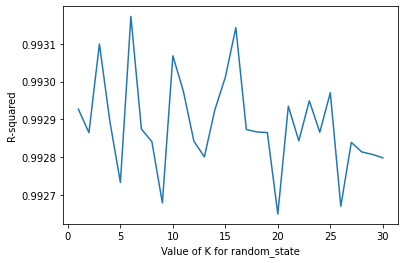

In [44]:
kfolds_regression = KFold(n_splits = 10, random_state = 1, shuffle = True)
k_range = range(1, 31)
k_scores = []
for k in k_range:
    model = DecisionTreeRegressor(random_state = k)
    loss = abs(cross_val_score(model, stock3[['S','K', 'tau', 'r']], stock3['Value'], cv=kfolds_regression, scoring='r2'))
    k_scores.append(loss.mean())
    
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for random_state')
plt.ylabel('R-squared')
plt.show()

This shows that Decision Tree Regressor works best for random_state = 6

## **Decision Tree Classifier**

In [45]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import KFold

In [46]:
X = stock3[['S', 'K', 'tau', 'r']]
y = stock3['BS_class']

In [47]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)

In [48]:
from sklearn.model_selection import cross_val_score
dtc = DecisionTreeClassifier(max_depth = 5)
error_model_1_cv = cross_val_score(dtc,stock_train_norm,y, cv=kfolds)

In [49]:
import numpy as np
print("SVM: \n")
print("accuracies of 10-folds:",error_model_1_cv,"(mean classification error:",1-np.mean(error_model_1_cv),")")

SVM: 

accuracies of 10-folds: [0.92261905 0.89880952 0.9047619  0.89880952 0.91071429 0.89820359
 0.92814371 0.92814371 0.88622754 0.91017964] (mean classification error: 0.09133875106929012 )


In [50]:
dtc.fit(stock_train_norm, y)
y_pred =  dtc.predict(stock_train_norm)

In [51]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
fpr,tpr,threshold = roc_curve(y, y_pred)

In [52]:
from sklearn.metrics import auc
roc_auc = auc(fpr,tpr)
roc_auc

0.94322495700618

<Figure size 432x288 with 0 Axes>

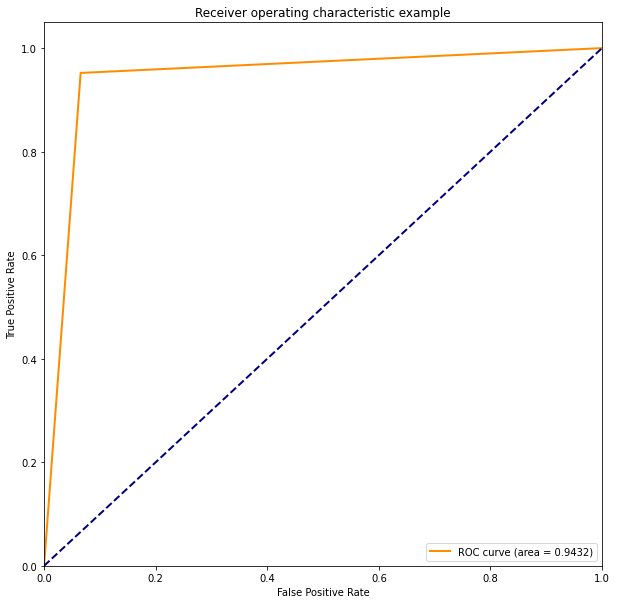

In [53]:
plt.figure()
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
lw=2, label='ROC curve (area = {0:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # lw is linewidth
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## **Random Forest**

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [55]:
df = stock
df['BS']= [1 if i == "Over" else 0 for i in df['BS']]
df.head()

,Value,S,K,tau,r,BS
0,21.670404,431.623898,420.0,0.341270,0.03013,0
1,0.125000,427.015526,465.0,0.166667,0.03126,1
2,20.691244,427.762336,415.0,0.265873,0.03116,0
3,1.035002,451.711658,460.0,0.063492,0.02972,1
4,39.553020,446.718974,410.0,0.166667,0.02962,0


In [56]:
df = df.dropna()

In [57]:
target= np.array(df['Value'])
features = df.drop(['BS','Value'], axis = 1)
feature_list = list(features.columns)
features = np.array(features)
X_train1, X_test1, y_train1, y_test1 = \
    train_test_split(features, target,
                     test_size=0.5,
                     random_state=2)

## RANDOM FOREST - KFOLD AND MODEL 
feature_list

['S', 'K', 'tau', 'r']

In [58]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [59]:
# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# rf = RandomForestRegressor()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# rf_random.fit(X_train1, y_train1)

# print(rf_random.best_params_)

In [60]:
kf = KFold(n_splits=10,random_state=42,shuffle=True)
accuracies = []
for train_index, test_index in kf.split(features):

    data_train   = features[train_index]
    target_train = target[train_index]

    data_test    = features[test_index]
    target_test  = target[test_index]

    rf = RandomForestRegressor(n_estimators = 800, 
                               random_state = 2, 
                               criterion = 'mse',
                               min_samples_leaf = 1,
                               min_samples_split= 2,
                               max_features = 'auto',
                               bootstrap=True,
                               max_depth = 100)
    
    rf.fit(data_train, target_train)

    predictions = rf.predict(data_test)

    errors = abs(predictions - target_test)

    print('Mean Absolute Error:', round(np.mean(errors), 2))
    
    mape = 100 * (errors / target_test)
    accuracy = 100 - np.mean(mape)
    print('Accuracy:', round(accuracy, 2), '%.')

    accuracies.append(accuracy)
    print('Score: %.2f' % rf.score(X_test1, y_test1, sample_weight=None))
    print(rf.score(X_test1, y_test1))

average_accuracy = np.mean(accuracies)
print('Average accuracy:', average_accuracy)

C:\Users\Software\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


Mean Absolute Error: 0.61
Accuracy: 79.03 %.
Score: 1.00
0.9991583718743815


C:\Users\Software\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


Mean Absolute Error: 0.63
Accuracy: 84.82 %.
Score: 1.00
0.9990640686567087


C:\Users\Software\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


Mean Absolute Error: 0.54
Accuracy: 83.88 %.
Score: 1.00
0.9990385266340774


C:\Users\Software\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


Mean Absolute Error: 0.58
Accuracy: 85.56 %.
Score: 1.00
0.9990949296596316


C:\Users\Software\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


Mean Absolute Error: 0.55
Accuracy: 85.02 %.
Score: 1.00
0.9992556310324613


C:\Users\Software\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


Mean Absolute Error: 0.6
Accuracy: 81.78 %.
Score: 1.00
0.9988494683413048


C:\Users\Software\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


Mean Absolute Error: 0.56
Accuracy: 87.38 %.
Score: 1.00
0.9990525218766281


C:\Users\Software\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


Mean Absolute Error: 0.56
Accuracy: 87.75 %.
Score: 1.00
0.9992488352243621


C:\Users\Software\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


Mean Absolute Error: 0.6
Accuracy: 80.51 %.
Score: 1.00
0.9990901748260361


C:\Users\Software\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


Mean Absolute Error: 0.59
Accuracy: 89.64 %.
Score: 1.00
0.9990358962467045
Average accuracy: 84.53788217189246


# **Random Forest Classification**

In [61]:
#Classification Problem
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
target= np.array(df['BS'])
features = df.drop(['BS','Value'], axis = 1)
feature_list = list(features.columns)
features = np.array(features)

In [62]:
#Uncomment the three cells below to get roc auc
#ROC curve
# fpr,tpr,threshold = roc_curve(y_test, pred)

In [63]:
# roc_auc = auc(fpr,tpr)
# roc_auc

In [64]:
# plt.figure()
# plt.figure(figsize=(10,10))
# plt.plot(fpr, tpr, color='darkorange',
# lw=2, label='ROC curve (area = {0:.4f})'.format(roc_auc))
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # lw is linewidth
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic example')
# plt.legend(loc="lower right")
# plt.show()

In [65]:
# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# rf = RandomForestRegressor()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# rf_random.fit(X_train1, y_train1)

# print(rf_random.best_params_)

# **Linear Regression**

In [66]:
stock_train = stock3[['S','K', 'tau', 'r']]
y_train = stock3[['Value']]

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
kfolds_regresssion = KFold(n_splits = 10, random_state = 1, shuffle = True)
reg = LinearRegression()
r2_model_1_cv = cross_val_score(reg, stock_train_norm,y_train, cv=kfolds_regresssion)

print("r squared of 10-folds:",r2_model_1_cv,"(mean r squared:",np.mean(r2_model_1_cv),")")

r squared of 10-folds: [0.91013457 0.90870031 0.906892   0.9056598  0.9035455  0.90749137
 0.92321078 0.92539214 0.90659812 0.90553517] (mean r squared: 0.910315975262787 )


In [69]:
reg.fit(stock_train_norm, y_train)

LinearRegression()

# **Logistic Regression**

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
stock_train = stock3[['S','K', 'tau', 'r']]
y_train = np.array(stock3['BS_class'])

In [72]:
logreg = LogisticRegression()#.fit(stock_train_norm, y_train)

In [73]:
from sklearn.model_selection import cross_val_score
error_model_1_cv = cross_val_score(logreg,stock_train_norm,y_train, cv=kfolds)

import numpy as np
print("SVM: \n")
print("accuracies of 10-folds:",error_model_1_cv,"(mean classification error:",1-np.mean(error_model_1_cv),")")

SVM: 

accuracies of 10-folds: [0.93452381 0.88095238 0.93452381 0.89285714 0.91071429 0.89221557
 0.94610778 0.91017964 0.88622754 0.91616766] (mean classification error: 0.08955303678357573 )


In [74]:
logreg = LogisticRegression().fit(stock_train_norm, y_train)

In [75]:
y_pred = logreg.predict(stock_train_norm)

In [76]:
#ROC curve
fpr,tpr,threshold = roc_curve(y_train, y_pred)

In [77]:
roc_auc = auc(fpr,tpr)
roc_auc

0.90998848664654

<Figure size 432x288 with 0 Axes>

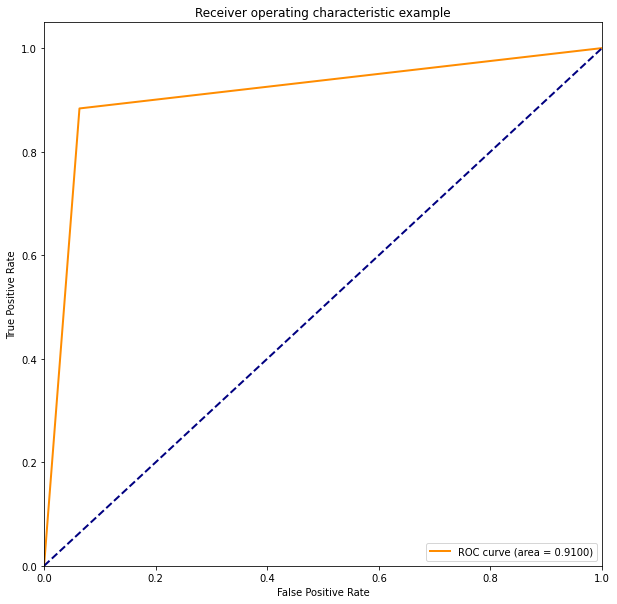

In [78]:
plt.figure()
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
lw=2, label='ROC curve (area = {0:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # lw is linewidth
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# **K-NN Classification**

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics

### We need to standardize the values since the scale of features will have an impact on assigning neigbours for KNN

In [80]:
stock_train = stock3[['S','K','tau','r']]
y_train = np.array(stock3['BS_class'])

In [81]:
# split into training and test 
#X_train, X_test, y_train, y_test = train_test_split(stock_train, stock_test, test_size=0.25,random_state = 4,stratify = stock_test) # 70% training and 30% test

In [82]:
from sklearn.neighbors import KNeighborsClassifier

In [83]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=17)
error_model_1_cv = cross_val_score(knn,stock_train_norm,y_train, cv=kfolds)

import numpy as np
print("SVM: \n")
print("accuracies of 10-folds:",error_model_1_cv,"(mean classification error:",1-np.mean(error_model_1_cv),")")

SVM: 

accuracies of 10-folds: [0.94642857 0.93452381 0.94642857 0.9047619  0.91666667 0.89820359
 0.93413174 0.92215569 0.91616766 0.92215569] (mean classification error: 0.07583761049329885 )


In [84]:
logreg = knn.fit(stock_train_norm, y_train)

In [87]:
y_pred = logreg.predict(stock_train_norm)

In [89]:
y_pred.shape

(1675,)

In [ ]:
#choosing the ideal value for n_neighbors
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(stock_train_norm,y_train)
    pred_i = knn.predict(stock_train_norm)
    error_rate.append(np.mean(pred_i != y_test))

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that after around K=3 the error rate tends to minimize around 0.06. Let's retrain the model with that and check the classification report!

In [ ]:
# knn = KNeighborsClassifier(n_neighbors=3)
# knn.fit(X_train_std,y_train)

In [ ]:
y_pred = knn.predict(stock_train_norm)

In [ ]:
print(confusion_matrix(y_train,y_pred))

In [ ]:
print(f'The accuracy for K-NN Classifier is:{round(metrics.accuracy_score(y_test,pred),4)}')

Using Cross-Validation

In [ ]:
df_test.head()

In [ ]:
df_test.head()

In [ ]:
scaled_pred = stdsc.fit_transform(df_test)

In [ ]:
pred_test = knn.predict(scaled_pred)

In [ ]:
df_test.head()

In [ ]:
df_test['Class'] = pred_test

In [ ]:
df_test.head()

In [ ]:
#ROC curve
fpr,tpr,threshold = roc_curve(y_train, y_pred)

In [ ]:
roc_auc = auc(fpr,tpr)
roc_auc

In [ ]:
plt.figure()
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
lw=2, label='ROC curve (area = {0:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # lw is linewidth
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# **K-NN Regression**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
stock_train_1 = stock3[['S','K', 'tau', 'r']]
y_train = np.array(stock3['Value'])

In [ ]:
stdsc = StandardScaler()
stock_train_norm1 = stdsc.fit_transform(stock_train_1)
stock_test_norm1 = stdsc.transform(stock_test)

In [ ]:
kfolds_regresssion = KFold(n_splits = 10, random_state = 1, shuffle = True)
neigh = KNeighborsRegressor(n_neighbors=4)
r2_model_1_cv = cross_val_score(neigh, stock_train_norm1,y_train, cv=kfolds_regresssion)

print("r squared of 10-folds:",r2_model_1_cv,"(mean r squared:",np.mean(r2_model_1_cv),")")

In [ ]:
kfolds_regression = KFold(n_splits = 10, random_state = 1, shuffle = True)
k_range = range(1, 31)
k_scores = []
for k in k_range:
    model = KNeighborsRegressor(n_neighbors=k)
    loss = abs(cross_val_score(model, stock_train_norm1, stock3['Value'], cv=kfolds_regression, scoring='r2'))
    k_scores.append(loss.mean())
    
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for regression')
plt.ylabel('R-squared')
plt.show()

In [ ]:
neigh = KNeighborsRegressor(n_neighbors=4)
neigh.fit(stock_train_norm,y_train)

In [ ]:
y_test = neigh.predict(stock_train_norm)